<a href="https://colab.research.google.com/github/Bastian951/Heart-Failure-Prediction/blob/master/Heart%20Failure%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

# Heart Failure Prediction

Segun datos de la OMS las principales causas de muerte se deben a enfermedades cardiovasculares. 
Sin embargo la mayoría de estas enfermedades se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable, la inactividad física y el consumo de alcohol.

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a otros factores como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoz.

Es por esto que un modelo de aprendizaje automático puede ser de gran ayuda para la detección de enfermedades cardiovasculares. 
<figure>
<center>
<img  src="https://salutaprop.org/images/uploads/2016/09/06/large/ECV.jpg" width="400" height="300"/>
</center>
</figure>






# Dataset

El dataset utilizado titulado [**Heart Failure Prediction**](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) fue obtenido desde el sitio web [Kaggle ](https://www.kaggle.com).

Este conjunto de datos contiene 12 características que se pueden utilizar para predecir la mortalidad por insuficiencia cardíaca. 
Estas caracteristicas son 

**age:** Edad del paciente

**anaemia:** Toma el valor 1 si el paciente padece anemia y 0 si no.

**diabetes:** Toma el valor 1 si el paciente padece diabetes y 0 si no.

**creatinine_phosphokinase:** cantidad de creatina fosfocinasa en la sangre.

**ejection_fraction :** Porcentaje de sangre que sale del corazón del paciente cada vez que se contrae.

**high_blood_pressure:** Toma el valor 1 si el paciente tiene presión sanguínea alta y 0 si no.

**platelets:** Numero de plaquetas en la sangre del paciente

**serum_creatinine :** nivel de creatina en la sangre

**serum_sodium:** Nivel de sodio en la sangre

**sex:** Variable binaria toma el valor 1 si es hombre y el valor 0 si es mujer.

**smoking:** Toma el valor 1 si el paciente fuma y 0 si no.

**time:** Período de seguimiento 

**DEATH_EVENT:** Toma el valor 1 si el paciente murio en el periodo de seguimiento y 0 si no. 


In [ ]:
data  = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Análisis exploratorio de los datos

Primero veremos si existen datos faltantes, nulos o repetidos

In [ ]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data[data.duplicated(keep=False)].sum()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64



*   No existen datos nulos
*   Los datos son coherentes entre si
*   No existen datos duplicados







Ahora crearemos un dashboard interactivo para ver los graficos

In [ ]:
import altair as alt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [ ]:
def heart_disease_chart(col2,col1):
    datos = data[col2]
    
    chart = alt.Chart(data).mark_circle().encode(
        x=alt.X(col1,title=col1),
        y=alt.Y(col2,title=col2),
    ).properties(
        width=600,
        height=400,
        title = col1+' VS '+col2
    )
    
    chart.display()
    return

In [ ]:
col1_widget = widgets.Dropdown(
    options=['age','anaemia', 'creatinine_phosphokinase', 
             'diabetes', 'ejection_fraction', 'high_blood_pressure',
             'platelets', 'serum_creatinine', 'serum_sodium',
             'sex', 'smoking','time'],
    description='Eje X',
    continuous_update = False
)


col2_widget = widgets.Dropdown(
    options=['age','anaemia', 'creatinine_phosphokinase', 
             'diabetes', 'ejection_fraction', 'high_blood_pressure',
             'platelets', 'serum_creatinine', 'serum_sodium',
             'sex', 'smoking','time','DEATH_EVENT'],
    description='Eje Y',
    continuous_update = False
)

In [ ]:
heart_dashboard = interactive(
    heart_disease_chart,
    col2=col2_widget,
    col1=col1_widget
)
heart_dashboard



interactive(children=(Dropdown(description='Eje Y', options=('age', 'anaemia', 'creatinine_phosphokinase', 'di…

Ahora veamos la distrubición de las muertes

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


No Muertos 67.89 % of the dataset
Muertos 32.11 % of the dataset


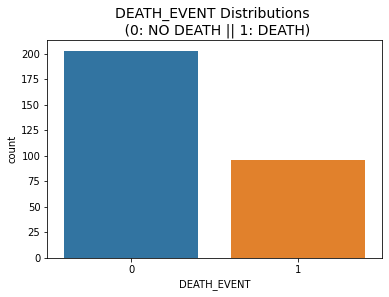

In [ ]:
sns.countplot('DEATH_EVENT', data=data)
plt.title('DEATH_EVENT Distributions \n (0: NO DEATH || 1: DEATH)', fontsize=14)

print('No Muertos', round(data['DEATH_EVENT'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Muertos', round(data['DEATH_EVENT'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Un 32.11% de los pacientes murieron mientras se hacia el seguimiento, por lo que podriamos decir que estamos desbalanceados. 
Para solventar esto, realizaremos undersamplig y oversampling.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

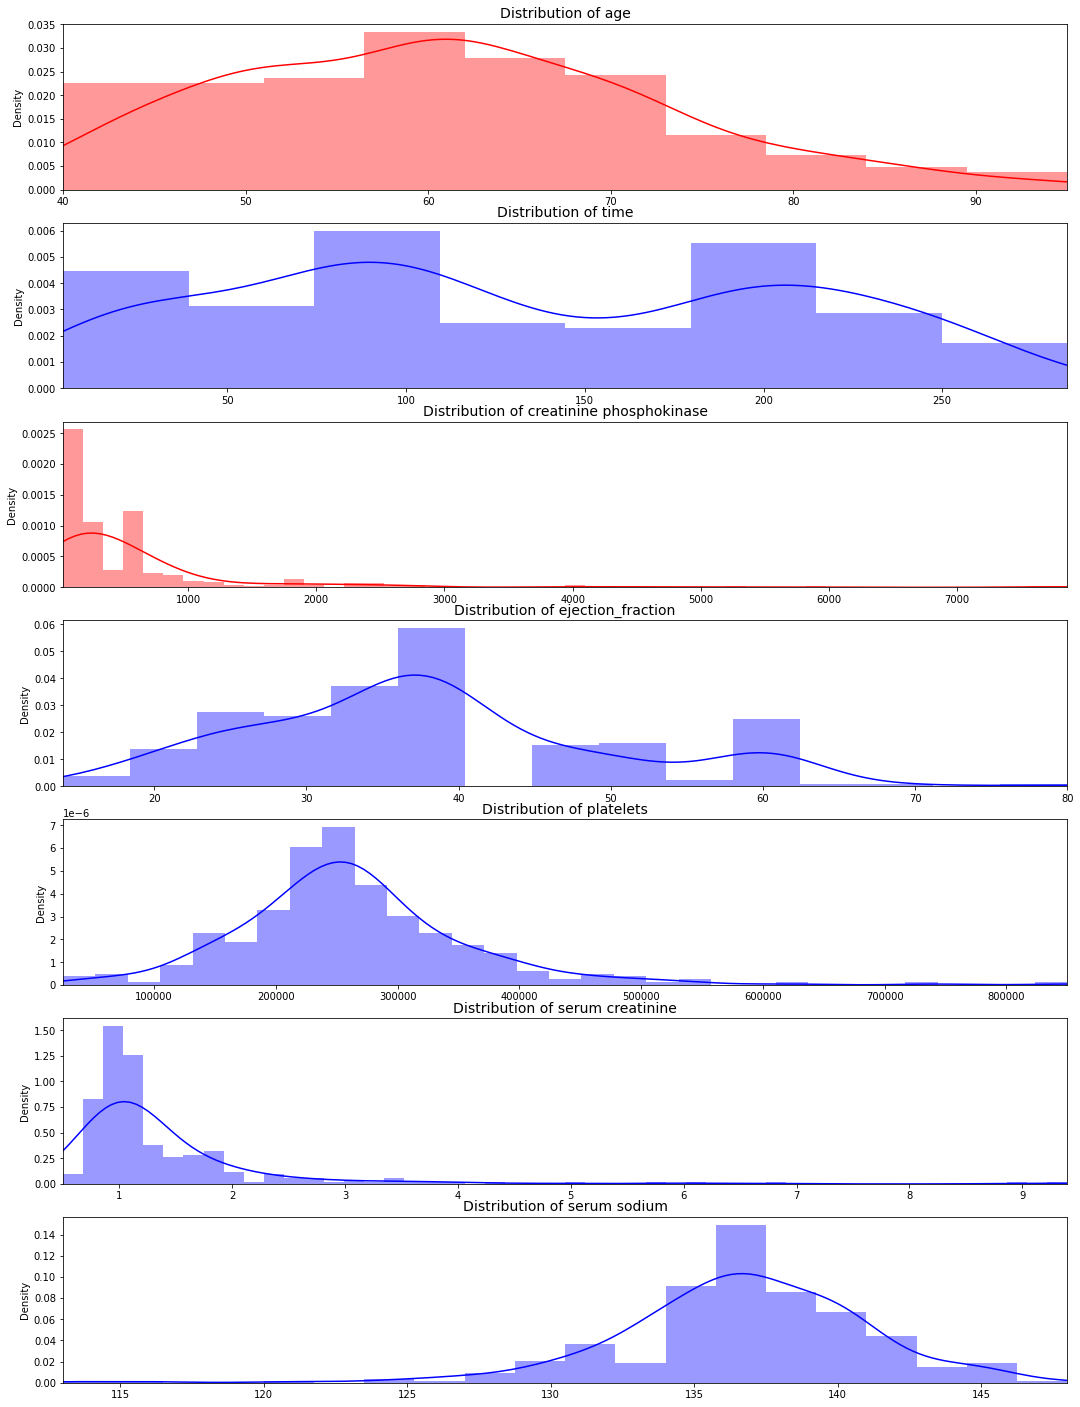

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(18,25))

amount_val = data['age'].values
time_val = data['time'].values
creaphos_val = data["creatinine_phosphokinase"].values
ejec_val = data["ejection_fraction"].values  
platelets_val =data["platelets"].values
ser_crea_val = data["serum_creatinine"].values  
ser_sod_val =data["serum_sodium"].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of age', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(creaphos_val, ax=ax[2], color='r')
ax[2].set_title('Distribution of creatinine phosphokinase', fontsize=14)
ax[2].set_xlim([min(creaphos_val), max(creaphos_val)])

sns.distplot(ejec_val, ax=ax[3], color='b')
ax[3].set_title('Distribution of ejection_fraction', fontsize=14)
ax[3].set_xlim([min(ejec_val), max(ejec_val)])

sns.distplot(platelets_val, ax=ax[4], color='b')
ax[4].set_title('Distribution of platelets', fontsize=14)
ax[4].set_xlim([min(platelets_val), max(platelets_val)])

sns.distplot(ser_crea_val, ax=ax[5], color='b')
ax[5].set_title('Distribution of serum creatinine', fontsize=14)
ax[5].set_xlim([min(ser_crea_val), max(ser_crea_val)])

sns.distplot(ser_sod_val, ax=ax[6], color='b')
ax[6].set_title('Distribution of serum sodium', fontsize=14)
ax[6].set_xlim([min(ser_sod_val), max(ser_sod_val)])

plt.show()

Notemos que hay valores atipicos en serum creatinine, en creatinine phosphokinase y serum_sodium

# Preprocesamiento



In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rob_scaler = RobustScaler()

data['scaled_age'] = rob_scaler.fit_transform(data['age'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['time'].values.reshape(-1,1))
data['scaled_creatinine_phosphokinase'] = rob_scaler.fit_transform(data['creatinine_phosphokinase'].values.reshape(-1,1))
data['scaled_ejection_fraction'] = rob_scaler.fit_transform(data['ejection_fraction'].values.reshape(-1,1))
data['scaled_platelets'] = rob_scaler.fit_transform(data['platelets'].values.reshape(-1,1))
data['scaled_serum_creatinine'] = rob_scaler.fit_transform(data['serum_creatinine'].values.reshape(-1,1))
data['scaled_serum_sodium'] = rob_scaler.fit_transform(data['serum_sodium'].values.reshape(-1,1))

data.drop(['age','time','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'], axis=1, inplace=True)


# Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X = data.drop("DEATH_EVENT",axis=1)
y =data["DEATH_EVENT"]

X_under, y_under = undersample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(f"Dimensiones Undersampling: {X_under.shape}\nDimensiones Oversampling: {X_over.shape}")

Dimensiones Undersampling: (192, 12)
Dimensiones Oversampling: (406, 12)


# Modelos 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Regresión logistica


In [ ]:
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg_under = GridSearchCV(LogisticRegression(penalty="l2"), log_reg_params)
grid_log_reg_under.fit(X_train_under, y_train_under)
# We automatically get the logistic regression with the best parameters.
log_reg_under = grid_log_reg_under.best_estimator_

In [ ]:
log_reg_under

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_lg_under = log_reg_under.predict(X_test_under)


print('---' * 45)
print('Accuracy score Logistic regresion Undersampling: {:.2f}'.format(accuracy_score(y_test_under, y_pred_under)))

cm = confusion_matrix(y_test_under,y_pred_lg_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score Logistic regresion Undersampling: 0.85
Matriz de confusión:
 [[14  4]
 [ 2 19]]


# KNN

In [103]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears_under = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears_under.fit(X_train_under, y_train_under)
# KNears best estimator
knears_neighbors_under= grid_knears_under.best_estimator_

y_pred_knn_under = knears_neighbors_under.predict(X_test_under)


print('---' * 45)
print('Accuracy score KNN Undersampling: {:.2f}'.format(accuracy_score(y_test_under, y_pred_knn_under)))

cm = confusion_matrix(y_test_under,y_pred_knn_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score KNN Undersampling: 0.69
Matriz de confusión:
 [[15  3]
 [ 9 12]]


#SVC

In [102]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc_under = GridSearchCV(SVC(), svc_params)
grid_svc_under.fit(X_train_under, y_train_under)

# SVC best estimator
svc_under = grid_svc_under.best_estimator_

y_pred_svc_under = svc_under.predict(X_test_under)


print('---' * 45)
print('Accuracy score SVC Undersampling: {:.2f}'.format(accuracy_score(y_test_under, y_pred_svc_under)))

cm = confusion_matrix(y_test_under,y_pred_svc_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score SVC Undersampling: 0.85
Matriz de confusión:
 [[14  4]
 [ 2 19]]


#DecisionTree Classifier

In [101]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree_under = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree_under.fit(X_train_under, y_train_under)

# tree best estimator
tree_clf_under = grid_tree_under.best_estimator_

y_pred_tree_under = tree_clf_under.predict(X_test_under)


print('---' * 45)
print('Accuracy score DecisionTree Undersampling: {:.2f}'.format(accuracy_score(y_test_under, y_pred_tree_under)))

cm = confusion_matrix(y_test_under,y_pred_tree_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score DecisionTree Undersampling: 0.82
Matriz de confusión:
 [[15  3]
 [ 4 17]]


# Red neuronal artificial

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 3, kernel_initializer = "uniform",activation = "relu", input_dim = 12))
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
classifier.fit(X_train_under, y_train_under,  batch_size = 5, epochs = 15)

Epoch 1/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4303
Epoch 2/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5712
Epoch 3/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5008
Epoch 4/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.7918
Epoch 5/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.7727
Epoch 6/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.7804
Epoch 7/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.7172
Epoch 8/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.7414
Epoch 9/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.7578
Epoch 10/15
31/31 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.7510
Epoch 11/15
31/31 [

In [ ]:
y_pred_rna_under  = classifier.predict(X_test_under)
y_pred_rna_under = (y_pred_rna_under>0.5)

In [100]:
print('---' * 45)
print('Accuracy score artificial neural network Undersampling: {:.2f}'.format(accuracy_score(y_test_under,y_pred_rna_under)))

cm = confusion_matrix(y_test_under,y_pred_rna_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score artificial neural network Undersampling: 0.82
Matriz de confusión:
 [[11  7]
 [ 0 21]]


# Red neuronal artificial MLPClassifier (Sklearn)

In [91]:
from sklearn.neural_network import MLPClassifier

In [99]:
mlpc = MLPClassifier(random_state=1, max_iter=1200).fit(X_train_under, y_train_under)
y_pred_mlpc_under=mlpc.predict(X_test_under)

print('---' * 45)
print('Accuracy score MLPCClassifier undersampling: {:.2f}'.format(accuracy_score(y_test_under,y_pred_mlpc_under)))

cm = confusion_matrix(y_test_under,y_pred_mlpc_under)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score MLPCClassifier undersampling: 0.87
Matriz de confusión:
 [[15  3]
 [ 2 19]]


# Resumen modelos ajustados con Undersampling


| Modelo |  Accuracy |
| --- | --- |
| LogisticRegression | 0.85 |
| KNeighborsClassifier | 0.69 |
| DecisionTree | 0.82 |
| SVC | 0.85|
|RNA (Keras) |0.82 |
|MLPClassifier| 0.87 |

En base a estos resultados podemos ver que la red neuronal MLPClassifier tuvo buenos resultados. Desde la documentación podemos ver que es una red neuronal con la siguiente estructura



*   100 neuronas por capa oculta, por defecto 1 capa oculta.
*   Activación relu
*   Optimizador Adam
*   Regularizador L2 con $\alpha=0.0001$
*   Batch size = min(200, n_samples)



Basandonos en estos parametros haremos un GridSearch para tratar de mejorar el 87% de precisión

In [275]:
def build_classifier(n1,n2,nl1,nl2,r):
  model = Sequential()
  model.add(Dense(n1, input_dim=12,kernel_regularizer=l2(nl1), bias_regularizer=l2(nl1), activation='relu'))
  model.add(Dropout(rate=r))
  model.add(Dense(n2, activation='relu',kernel_regularizer=l2(nl2), bias_regularizer=l2(nl2)))
  model.add(Dropout(rate=r))
  model.add(Dense(1, activation='sigmoid'))
# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return classifier


In [276]:
classifier2 = KerasClassifier(build_fn = build_classifier)

In [283]:
parameters = {
    'n1' : [100,90],
    'n2' : [100,90,10],
    'r' : [0.001,0.001],
    'nl1' : [0.01,0.00001],
    'nl2' : [0.01,0.0001,0.00001]
}

In [284]:
grid_search = GridSearchCV(estimator = classifier2, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10)
grid_search = grid_search.fit(X_train_under, y_train_under)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


5/5 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9416


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5/5 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9346


In [285]:
best_parameters

{'n1': 100, 'n2': 100, 'nl1': 0.01, 'nl2': 0.01, 'r': 0.001}

dict_keys(['loss', 'accuracy'])


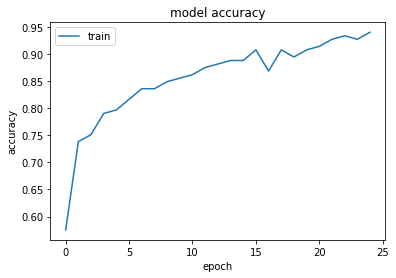

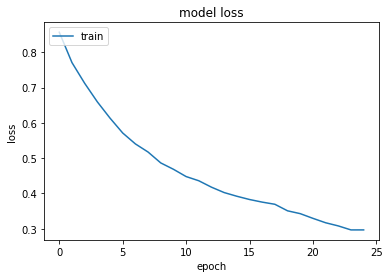

In [288]:
model = Sequential()
model.add(Dense(100, input_dim=12,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(rate=0.001))
model.add(Dense(100, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.001))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train_under, y_train_under, epochs=25, batch_size=12, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [289]:
y_pred_rna2_under=model.predict(X_test_under)
y_pred_rna2_under = (y_pred_rna2_under>0.5)

print('---' * 45)
print('Accuracy score RNA 3 undersampling: {:.2f}'.format(accuracy_score(y_test_under,y_pred_rna2_under)))

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score RNA 3 undersampling: 0.87


En conclusión mediante Undersampling no pudimos llegar mas de un 87% de precisión

# Oversampling

In [291]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Regresión Logistica

In [292]:
grid_log_reg_over = GridSearchCV(LogisticRegression(penalty="l2"), log_reg_params)
grid_log_reg_over.fit(X_train_over, y_train_over)
# We automatically get the logistic regression with the best parameters.
log_reg_over = grid_log_reg_over.best_estimator_

In [295]:
y_pred_lg_over = log_reg_over.predict(X_test_over)


print('---' * 45)
print('Accuracy score Logistic regresion Oversampling: {:.2f}'.format(accuracy_score(y_test_over, y_pred_lg_over)))

cm = confusion_matrix(y_test_over,y_pred_lg_over)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score Logistic regresion Oversampling: 0.87
Matriz de confusión:
 [[35  6]
 [ 5 36]]


#KNN

In [296]:
grid_knears_over = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears_over.fit(X_train_over, y_train_over)
# KNears best estimator
knears_neighbors_over= grid_knears_over.best_estimator_

y_pred_knn_over = knears_neighbors_over.predict(X_test_over)


print('---' * 45)
print('Accuracy score KNN oversampling: {:.2f}'.format(accuracy_score(y_test_over, y_pred_knn_over)))

cm = confusion_matrix(y_test_over,y_pred_knn_over)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score KNN oversampling: 0.89
Matriz de confusión:
 [[36  5]
 [ 4 37]]


# SVC

In [297]:
grid_svc_over = GridSearchCV(SVC(), svc_params)
grid_svc_over.fit(X_train_over, y_train_over)

# SVC best estimator
svc_over = grid_svc_over.best_estimator_

y_pred_svc_over = svc_over.predict(X_test_over)


print('---' * 45)
print('Accuracy score SVC Oversampling: {:.2f}'.format(accuracy_score(y_test_over, y_pred_svc_over)))

cm = confusion_matrix(y_test_over,y_pred_svc_over)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score SVC Oversampling: 0.87
Matriz de confusión:
 [[34  7]
 [ 4 37]]


# DecisionTree Classifier

In [299]:
grid_tree_over = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree_over.fit(X_train_over, y_train_over)

# tree best estimator
tree_clf_over = grid_tree_over.best_estimator_

y_pred_tree_over = tree_clf_over.predict(X_test_over)


print('---' * 45)
print('Accuracy score DecisionTree Oversampling: {:.2f}'.format(accuracy_score(y_test_over, y_pred_tree_over)))

cm = confusion_matrix(y_test_over,y_pred_tree_over)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score DecisionTree Oversampling: 0.82
Matriz de confusión:
 [[33  8]
 [ 7 34]]


# MLPClassifier

In [301]:
mlpc = MLPClassifier(random_state=1, max_iter=1200).fit(X_train_over, y_train_over)
y_pred_mlpc_over=mlpc.predict(X_test_over)

print('---' * 45)
print('Accuracy score MLPCClassifier Oversampling: {:.2f}'.format(accuracy_score(y_test_over,y_pred_mlpc_over)))

cm = confusion_matrix(y_test_over,y_pred_mlpc_over)
print("Matriz de confusión:\n",cm)

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score MLPCClassifier Oversampling: 0.87
Matriz de confusión:
 [[33  8]
 [ 3 38]]


# RNA

dict_keys(['loss', 'accuracy'])


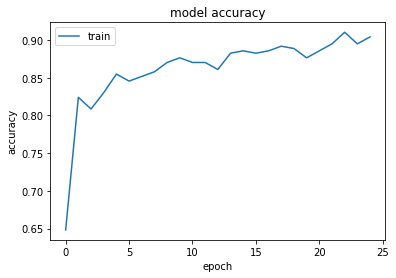

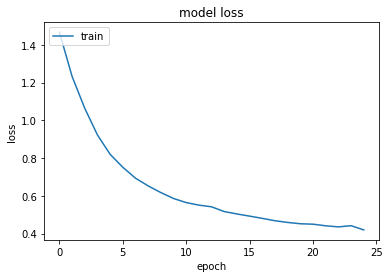

In [321]:
model = Sequential()
model.add(Dense(75, input_dim=12,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(rate=0.001))
model.add(Dense(70, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.001))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train_over, y_train_over, epochs=25, batch_size=12, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [322]:
y_pred_rna2_over=model.predict(X_test_over)
y_pred_rna2_over = (y_pred_rna2_over>0.5)

print('---' * 45)
print('Accuracy score RNA 2 Oversampling: {:.2f}'.format(accuracy_score(y_test_over,y_pred_rna2_over)))

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy score RNA 2 Oversampling: 0.88


# Resumen modelos ajustados con Oversampling


| Modelo |  Accuracy |
| --- | --- |
| LogisticRegression | 0.87 |
| KNeighborsClassifier | 0.89 |
| DecisionTree | 0.87 |
| SVC | 0.85|
|RNA (Keras) |0.88 |
|MLPClassifier| 0.87 |

# Conclusión

Podemos notar que se obtuvieron buenos resultados con el oversampling, a pesar de haber entrenado los modelos solo con 153 datos y 324 datos respectivamente. Sin embargo no fue posible llegar a un 90% de precisión.
Pero con un 87-89% de precición puede ser util para realizar un seguimiento de pacientes prosiblemente criticos.